# Mechanistische Effekt-Modellierung 
# Übungsblatt 1
Die Aufgaben sollen in **Zweiergruppen** bearbeitet werden und bis zum **09.11.2023 10:00 Uhr** in den entsprechenden Ordner in StudIP hochgeladen werden. Alle Grafiken, schriftlichen Lösungen etc. sollen **innerhalb des Notebooks** geschehen und als solches abgegeben werden. Bedeutet, dass unter den Aufgaben, die schriftliche Lösungen erfordern, Textfelder (Raw) zur verfügung stehen, sowie unter den Programmieraufgaben Codefelder (Code). Der Code, der Grafiken etc. erstellt, muss dabei **reproduzierbar** sein, also beim ereuten Ausführen des Notebooks wieder funktionieren. 

Als Abgabe laden Sie bitte ihr bearbeitetes **IPython Notebook** (ipynb) zusammen mit ihrem **Notebook als PDF** (File/Print.../Print to PDF) in einem **ZIP Ordner** hoch. Benennen Sie dabei alle Dateien und den ZIP Ordner entsprechend ihrer Gruppe (z.B. 'Blatt1_Nachname1_Nachname2.ipynb').

Zum Ausführen der einzelnen Zellen können Sie auf den 'Play'-Kopf oben drücken, oder die aktuelle Zelle mit ```Shift``` und ```Enter``` ausführen. Damit die imports und Dateiaufrufe funktionieren, müssen alle Dateien im selben Ordner vorhanden sein wie das aktuelle Notebook. Sie können neue Codefelder erzeugen indem Sie auf das kleine ```+``` links oben in der Oberfläche klicken.

Tragen Sie ihre beiden Namen in das folgende Textfeld ein.

## Aufgabe 1: Lethal Concentration (13 P.)
### a) Definieren Sie jeweils LC50 und EC50. Was sind die Unterschiede zwischen den beiden Werten?(2 P.)

### Schauen Sie sich den Beispielcode zur LC50 Berechnung an. 
### b) Für welchen Zeitpunkt nach Beginn der Exposition wird im Code die Berechnung durchgeführt? Notieren Sei auch die entsprechende Codezeile, in welcher der Zeitpunkt definiert wird. (1 P.)

### c) Mit welcher Formel kann aus den gefitteten Parametern der LC50 Wert berechnet werden? (1 P.)

### d) Tragen Sie die Berechnung an der markierten Stelle im Code ein und überprüfen Sie das Ergebnis visuell in der Grafik. (1 P.)

### Beispielcode LC50

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [ ]:
data_path = os.path.join("MS_C1_caenis.xlsx")
survival = pd.read_excel(data_path,sheet_name="Survival",index_col="Time [h]")
exposure = pd.read_excel(data_path,sheet_name="Exposure",index_col="Time [h]")
exposure48 = exposure.loc[48][3:]
survival48 = survival.loc[48][3:]
survival48 /= np.max(survival48)
fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(exposure48,survival48)
ax.set(ylabel="Survival",xlabel="Concentration",xscale="log")
plt.show()
survival

In [ ]:
from scipy.optimize import curve_fit
def logfunc(C,a,b):
    return 1/(1+(np.log10(C)/a)**b)

popt, pcov = curve_fit(logfunc, exposure48, survival48, maxfev=3000)
popt

In [ ]:
fig, ax = plt.subplots()
ax.scatter(exposure48,survival48,label="Datapoints")
xax = np.linspace(1,np.max(exposure48)**1.1,1000)
ax.plot(xax,logfunc(xax,*popt),color="red",label="Logistic Fit")
ax.set(ylabel="Survival",xlabel="Concentration",xscale="log", ylim=[-0.05,None])

lc50 = 10**(popt[0])
    
ax.plot([lc50,lc50],[-0.1,0.5],color="green",ls="--",label=f"LC_50={lc50:.2f}")
ax.plot([0,lc50],[0.5,0.5],color="green",ls="--")
ax.legend(loc="lower left")
print("LC50 = ",lc50)

plt.show()

### e) Berechnen Sie den LC50 Wert für Caenis an den Zeitpunkten 24h, 48h, 72h und 96h und stellen Sie das Ergebnis in einer 2D Grafik (Zeit-LC50, siehe Übungsfolien) dar. (5 P.)
Kopieren bzw. schreiben Sie den Code dafür unter diese Anweisung, um den Orgininalbeispielcode nicht zu überschreiben.
Sie können neue Codefelder erzeugen indem Sie auf das kleine ```+``` links oben in der Oberfläche klicken.

Tipp: Sie benötigen die LC50 Werte dieser Aufgabe später nocheinmal, verwenden Sie daher möglichst geeignete Variablennamen, die Sie nicht wieder überschreiben.

In [ ]:
# Create empty lists to store LC50 values and time
lc50_values = []
times = [24, 48, 72, 96]

# Iterate over timepoints and calculate LC50 values
for time in times:
    exposure_time = exposure.loc[time][3:]
    survival_time = survival.loc[time][3:]
    survival_time /= np.max(survival_time)
    popt, pcov = curve_fit(logfunc, exposure_time, survival_time, maxfev=3000)
    lc50 = 10**(popt[0])
    lc50_values.append(lc50)

# Create a DataFrame from the LC50 values and timepoints
lc50_data = {
    'Time': times,
    'LC50 Value': lc50_values
}

lc50_df = pd.DataFrame(lc50_data)

# Display the DataFrame
print(lc50_df)

In [ ]:
fig, ax = plt.subplots()
ax.plot(lc50_df['Time'], lc50_df['LC50 Value'], marker='o', color='g', label='LC50 Values')
ax.set(ylabel="Concentration", xlabel="Exposure time", title = 'Caenis')
ax.legend()
plt.show()

### f) Laden Sie die Tabelle mit den Werten für Asellus ```MS_C1_Asellus.xlsx``` in obigen LC50 Beispielcode, führen ihn aus und vergleichen das Ergebnis mit dem für Caenis. Welchen Ergebnissen würden Sie eher vertrauen und warum? (3 P.)
Bei dieser Aufgabe muss kein neuer Code produziert werden, sondern nur ein anderer Datensatz in den gegebenen LC50 Beispielcode geladen und anhand der Ergebnisgrafik die Frage beantwortet werden.

In [ ]:
data_path_asellus = os.path.join("MS_C1_Asellus.xlsx")
survival_asellus = pd.read_excel(data_path_asellus,sheet_name="Survival",index_col="Time [h]")
exposure_asellus = pd.read_excel(data_path_asellus,sheet_name="Exposure",index_col="Time [h]")

In [ ]:
# Create empty lists to store LC50 values and time
lc50_values_asellus = []
times = [24, 48, 72, 96]

# Iterate over timepoints and calculate LC50 values
for time in times:
    exposure_time = exposure_asellus.loc[time][3:]
    survival_time = survival_asellus.loc[time][3:]
    survival_time /= np.max(survival_time)
    popt, pcov = curve_fit(logfunc, exposure_time, survival_time, maxfev=3000)
    lc50 = 10**(popt[0])
    lc50_values_asellus.append(lc50)

# Create a DataFrame from the LC50 values and timepoints
lc50_data_asellus = {
    'Time': times,
    'LC50 Value': lc50_values_asellus
}

lc50_df_asellus = pd.DataFrame(lc50_data_asellus)

# Display the DataFrame
print(lc50_df_asellus)

In [ ]:
fig, ax = plt.subplots()
ax.plot(lc50_df_asellus['Time'], lc50_df_asellus['LC50 Value'], marker='o', color='g', label='LC50 Values')
ax.set(ylabel="Concentration", xlabel="Exposure time", title = 'Asellus')
ax.legend()
plt.show()

## Aufgabe 2: GUTS Fitting (23 P.)
### a) Die beiden GUTS-RED Modellvarianten SD und IT (ohne Hintergrundmortalität) unterscheiden sich in ihrer Dynamik. Überlegen Sie auf Basis der jeweiligen Modell-Definitionen, welches Ergebnis (z.B. alle sterben, alle überleben, einige sterben/überleben) die beiden Modelle in den folgenden Fällen vorhersagen würden. 
### Die Exposition bersteht aus  zwei aufeinander folgenden Pulsen einer Chemikalie. Zwischen den beiden Pulsen vergeht so viel Zeit, dass sich der interne Schaden in den Individuen wieder vollständig abbauen kann.

#### i) Fall 1: Die beiden Pulse führen jeweils zu Schäden kleiner als der Schwellenwert (SD) bzw. Median (IT). (2 P.)
#### ii) Fall 2:Die beiden Pulse führen jeweils zu Schäden größer als der Schwellenwert (SD) bzw. Median (IT). (2 P.)

### b) Führen Sie den GUTS Beispielcode (siehe unten) aus und schauen Sie sich das Ergebnis der Kalibrierung an. Was fällt Ihnen auf und ist die Kalibrierung so brauchbar? (1 P.)

### c) Ändern Sie den Startwert für ```kd``` im Code für das SD und IT Modell jeweils auf die Werte 10, 1, 0.1,  und bewerten Sie jeweils kurz, ob sich für die Startwerte visuell 'sinnvolle' Kalibierungen des Modells ergeben. (3 P.)

### d) Ist die hier verwendete Nelder-Mead Optimierung deterministisch? Wie können Sie das testen? (2 P.)

### Beispielcode GUTS

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import MEMpytox
import importlib

,C_01,C_02,C_03,T_01,T_02,T_03,T_04,T_05,T_06,T_07,T_08,T_09,T_10,T_11,T_12,T_13,T_14,T_15
Time [h],,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,1,3,3,3,10,10,10,30,30,30,100,100,100
24,0,0,0,1,1,1,3,3,3,10,10,10,30,30,30,100,100,100
48,0,0,0,1,1,1,3,3,3,10,10,10,30,30,30,100,100,100
72,0,0,0,1,1,1,3,3,3,10,10,10,30,30,30,100,100,100
96,0,0,0,1,1,1,3,3,3,10,10,10,30,30,30,100,100,100


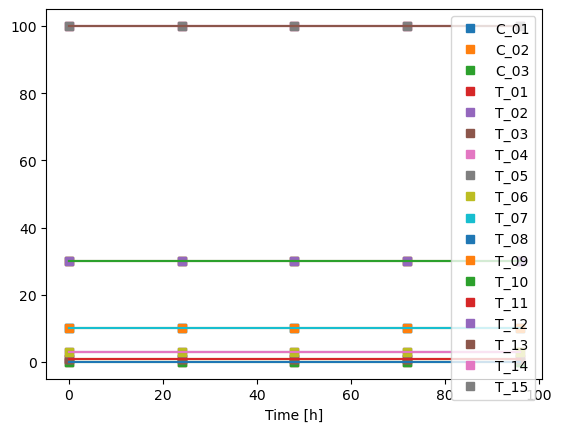

In [6]:
#Load exposure data and create interpolating functions
data_path = os.path.join("MS_C1_caenis.xlsx")
exposure_data = pd.read_excel(data_path, sheet_name='Exposure', index_col=0)
exposure_funcs = MEMpytox.multi_interp_treatment_generator(exposure_data)
times = np.linspace(exposure_data.index[0], exposure_data.index[-1], 200)
ax = exposure_data.plot(marker='s', ls='')
linestyles = ['k-.','k--', 'k-']
for treat, f in exposure_funcs.items():
    ax.plot(times, f(times))  
display(exposure_data)

,C_01,C_02,C_03,T_01,T_02,T_03,T_04,T_05,T_06,T_07,T_08,T_09,T_10,T_11,T_12,T_13,T_14,T_15
Time [h],,,,,,,,,,,,,,,,,,
0,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
24,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,3,6,2
48,10,10,10,10,10,10,10,10,10,10,10,10,8,9,7,1,3,2
72,10,10,10,10,10,10,10,10,10,10,10,10,3,5,4,0,0,0
96,10,10,10,10,10,10,10,10,10,10,10,10,2,3,2,0,0,0


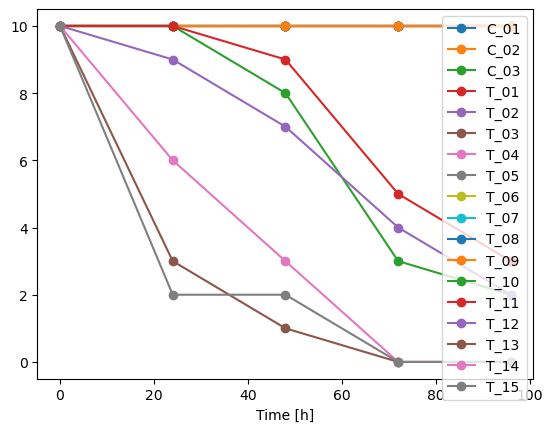

In [7]:
#Load survival data
survival_data = pd.read_excel(data_path, sheet_name='Survival', index_col=0)
survival_data.plot(marker='o')
display(survival_data)

In [8]:
datasets = [(exposure_funcs[treat], survival_data[treat]) for treat in survival_data.columns]

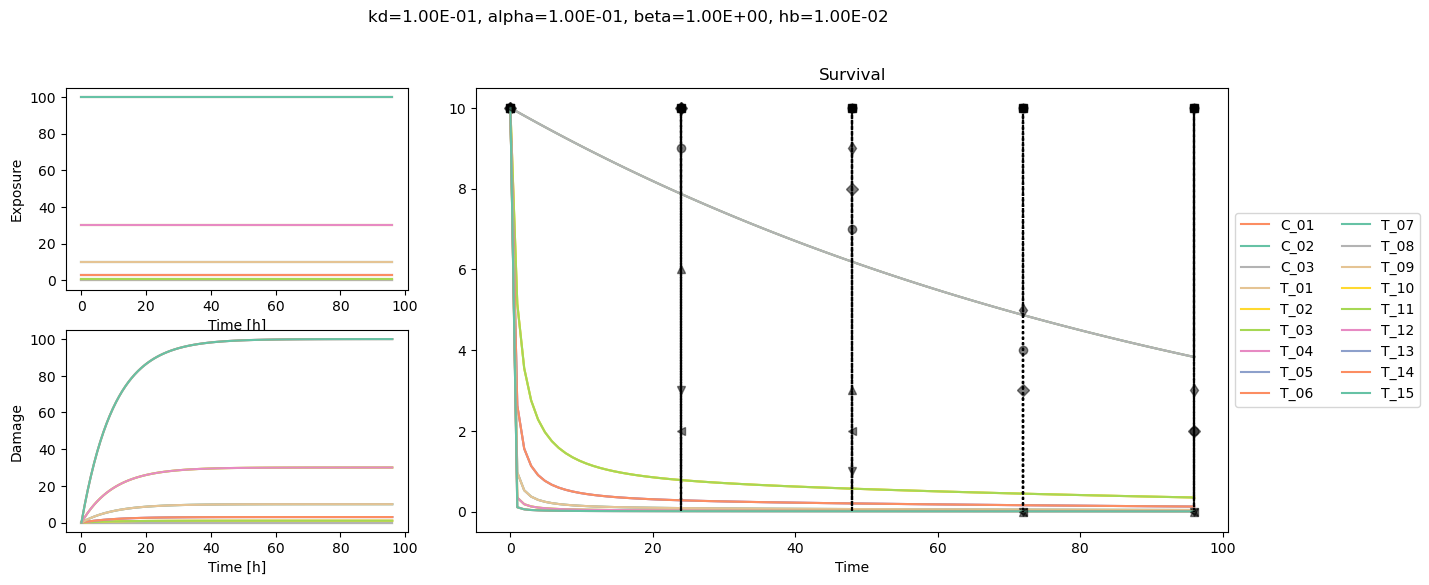

In [9]:
# Change between SD and IT model
guts_model = MEMpytox.GUTS_RED_IT()
#guts_model = MEMpytox.GUTS_RED_SD()

guts_model.params["kd"].value = 0.1 # Hier Startwerte für kd ändern
# shows model results with starting parameters before fitting
fig, ax = MEMpytox.plot_fit(guts_model, survival_data, exposure_funcs,subplots=False)

 15%|███████████▋                                                                   | 445/3000 [00:19<01:49, 23.29it/s]


Optimization terminated successfully.
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 444
    # data points      = 1
    # variables        = 4
    chi-square         = 6236.73218
    reduced chi-square = 6236.73218
    Akaike info crit   = 16.7382116
    Bayesian info crit = 8.73821163
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    kd:     0.00181445 (init = 0.1)
    alpha:  3.72385614 (init = 0.1)
    beta:   3.32720982 (init = 1)
    hb:     0.00000000 (init = 0.01)
CPU times: total: 18.3 s
Wall time: 19.2 s


name,value,initial value,min,max,vary
kd,0.00181445,0.1,1.0000e-10,100.000000,True
alpha,3.72385614,0.1,1.0000e-10,100.000000,True
beta,3.32720982,1.0,1.0000e-10,100.000000,True
hb,0.00000000,0.01,0.00000000,10.0000000,True


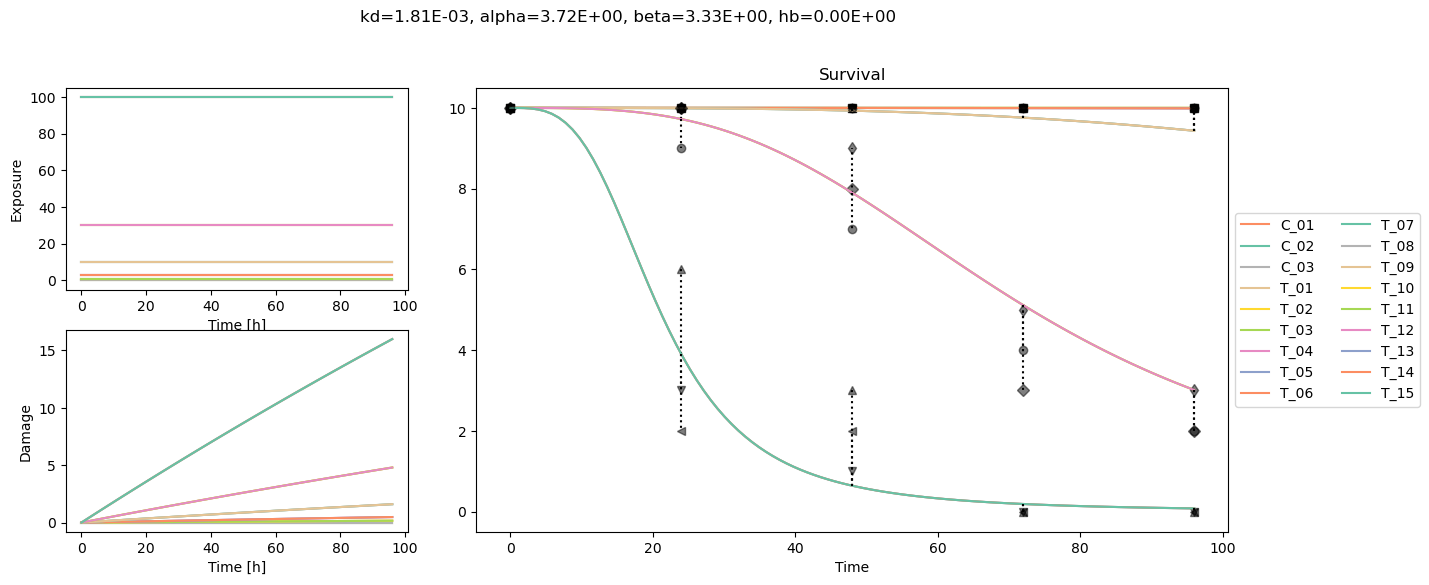

In [10]:
# Fit model by minimizing negative log likelihood function
%time res = guts_model.fit(datasets)
guts_model.params = res.params
# shows model with fitted parameters
fig, ax = MEMpytox.plot_fit(guts_model, survival_data, exposure_funcs, subplots=False)
display(guts_model.params)

Die unterschiedlichen Ergebnisse für verschiedene Anfangsbedingungen in 2c) lassen erahnen, dass die 'einfache' Nelder-Mead Optimierung nicht immer das globale Optimum der Parameter findet.
### e) Implementieren Sie einen einfachen 'Parameter Space Explorer', der automatisch verschiedene Startwerte (100, 10, 1, 0.1, 0.01, 0.001) für ```kd``` für die beiden Modelle kalibriert und stellen Sie die Ergebnisse dar. (5 P.)
Der Beispielcode zeigt eine Berechnung für das SD Modell und die Berechnung des negativen Log-Likelihood und des ```kd``` Parameters. Dargestellt werden sollten einmal die Werte der Zielfunktion für die Optimierung (negative Log-Likelihood) über den Startwerten und die kalibrierten ```kd``` Werte über den Startwerten. In beiden Plots sollen die Achsen mit den ```kd``` Werten (Start und kalibriert) logarithmisch skaliert dargestellt werden.

In [12]:
startVals = [0.001, 0.01, 0.1, 1, 10, 100]
g_models = [MEMpytox.GUTS_RED_SD(), MEMpytox.GUTS_RED_IT()] # 0 -> SD Modell; 1 -> IT Modell
res = [[],[]]
negLogLike = [[],[]]
calKd = [[],[]]
n = 0

for guts_model in g_models:
    for startValue in startVals:
        guts_model.params["kd"].value = startValue
        res[n].append(guts_model.fit(datasets, printres = False))
        print("negative Log-Likelihood", guts_model.negloglike(res[n][-1].params,datasets), "calibrated kd", res[n][-1].params["kd"].value)
        negLogLike[n].append(guts_model.negloglike(res[n][-1].params,datasets))
        calKd[n].append(res[n][-1].params["kd"].value)
    n = 1

 16%|████████████▋                                                                  | 482/3000 [00:19<01:44, 24.19it/s]


negative Log-Likelihood 160.12373545760133 calibrated kd 0.000548514191219261


 18%|██████████████                                                                 | 532/3000 [00:22<01:46, 23.25it/s]


negative Log-Likelihood 83.91852523748462 calibrated kd 0.004733466290788001


 17%|█████████████▏                                                                 | 502/3000 [00:22<01:50, 22.54it/s]


negative Log-Likelihood 160.1237390624953 calibrated kd 0.0005342326306739934


 24%|██████████████████▊                                                            | 716/3000 [00:34<01:49, 20.91it/s]


negative Log-Likelihood 77.48041481107465 calibrated kd 0.03590814371852674


 18%|█████████████▊                                                                 | 526/3000 [00:41<03:16, 12.57it/s]


negative Log-Likelihood 83.53268483749252 calibrated kd 7.094311480757894


 20%|███████████████▉                                                               | 606/3000 [00:47<03:05, 12.89it/s]


negative Log-Likelihood 83.59187988494664 calibrated kd 99.2218817013778


 24%|██████████████████▋                                                            | 710/3000 [00:24<01:19, 28.98it/s]


negative Log-Likelihood 78.97298385482914 calibrated kd 0.0018144540484603213


 20%|███████████████▍                                                               | 585/3000 [00:19<01:18, 30.69it/s]


negative Log-Likelihood 79.06379058043525 calibrated kd 1.2333133686247434e-10


 15%|███████████▋                                                                   | 445/3000 [00:19<01:49, 23.39it/s]


negative Log-Likelihood 78.97298385484052 calibrated kd 0.0018144480071317728


 26%|████████████████████▋                                                          | 786/3000 [00:31<01:28, 25.12it/s]


negative Log-Likelihood 105.44163272410529 calibrated kd 0.0012680914531946756


 22%|█████████████████▎                                                             | 656/3000 [00:36<02:09, 18.07it/s]


negative Log-Likelihood 133.29028815998734 calibrated kd 0.061397204240134166


 78%|█████████████████████████████████████████████████████████████▏                | 2352/3000 [02:30<00:41, 15.64it/s]


negative Log-Likelihood 149.862101850572 calibrated kd 54.49929290351387


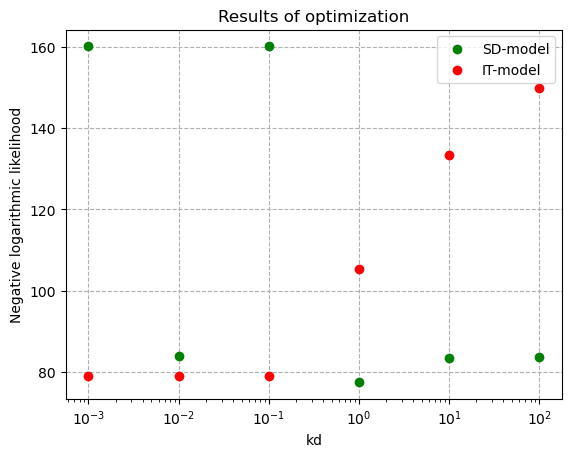

In [13]:
fig, ax = plt.subplots()
ax.scatter(startVals, negLogLike[0], marker='o', color='g', label = 'SD-model')
ax.scatter(startVals, negLogLike[1], marker='o', color='r', label = 'IT-model')
ax.set(ylabel="Negative logarithmic likelihood", xlabel="kd", title = 'Results of optimization', xscale ='log')
ax.grid(linestyle = "dashed")
ax.set_axisbelow(True)
ax.legend()
plt.show()

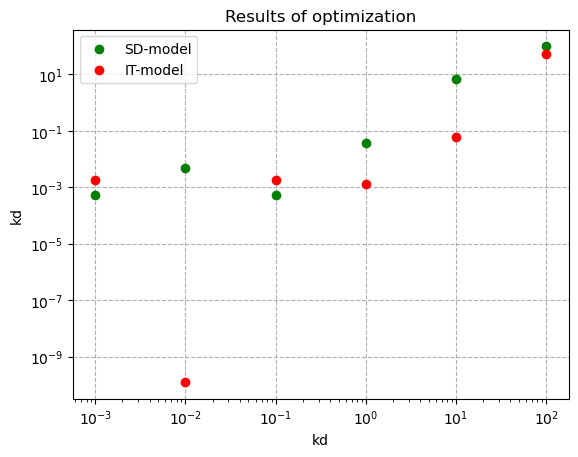

In [19]:
fig, ax = plt.subplots()
ax.scatter(startVals, calKd[0], marker='o', color='g', label = 'SD-model')
ax.scatter(startVals, calKd[1], marker='o', color='r', label = 'IT-model')
ax.set(ylabel="kd", xlabel="kd", title = 'Results of optimization', xscale = 'log', yscale = 'log')
ax.grid(linestyle = "dashed")
ax.set_axisbelow(True)
ax.legend()
plt.show()

### f) Beschreiben und interpretieren Sie die beiden erstellten Graphen. Was könnten die Ergebnisse für die Häufigkeit von lokalen Minima in der Optimierung bedeuten? (3 P.)

### g) Anhand von welchen Kriterien würden Sie aus ihren Ergebnissen in e) das jeweils 'beste' kalibrierte Modell aussuchen? Für welches Modell würden Sie sich jeweils entscheiden und warum? (2 P.)

### g) Erstellen Sie jeweils einen Zeitverlaufsplot wie im GUTS Beispielcode (```MEMpytox.plot_fit```) für ihre 'bestes' kalibriertes SD und IT Modell. Welche Unterschiede und Gemeinsamkeiten gibt es? (3 P.)
Vergeben Sie für die beiden Modelle neue Variablen wie z.B. ```sd_model``` und ```it_model```, um sie in der nächsten Aufgabe weiter verwenden zu können. 

Hinweis: Wenn Sie Aufgabe e) nicht gelöst haben, können Sie ihre Modelle ausgehend von kd=1 (SD) bzw. kd=0.1 (IT) optimieren lassen und die Modelle für die weiteren Aufgaben nutzen.

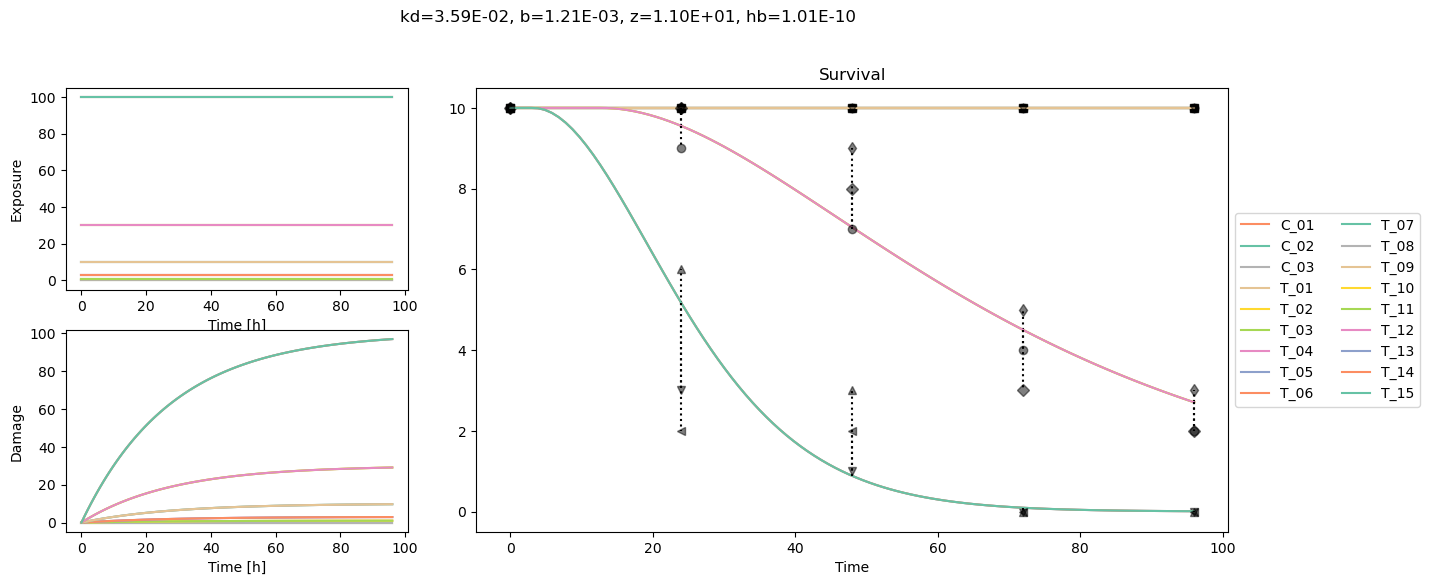

In [22]:
# Change between SD and IT model
sd_model = MEMpytox.GUTS_RED_SD()

sd_model.params = res[0][3].params 

# shows model results
fig, ax = MEMpytox.plot_fit(sd_model, survival_data, exposure_funcs,subplots=False)

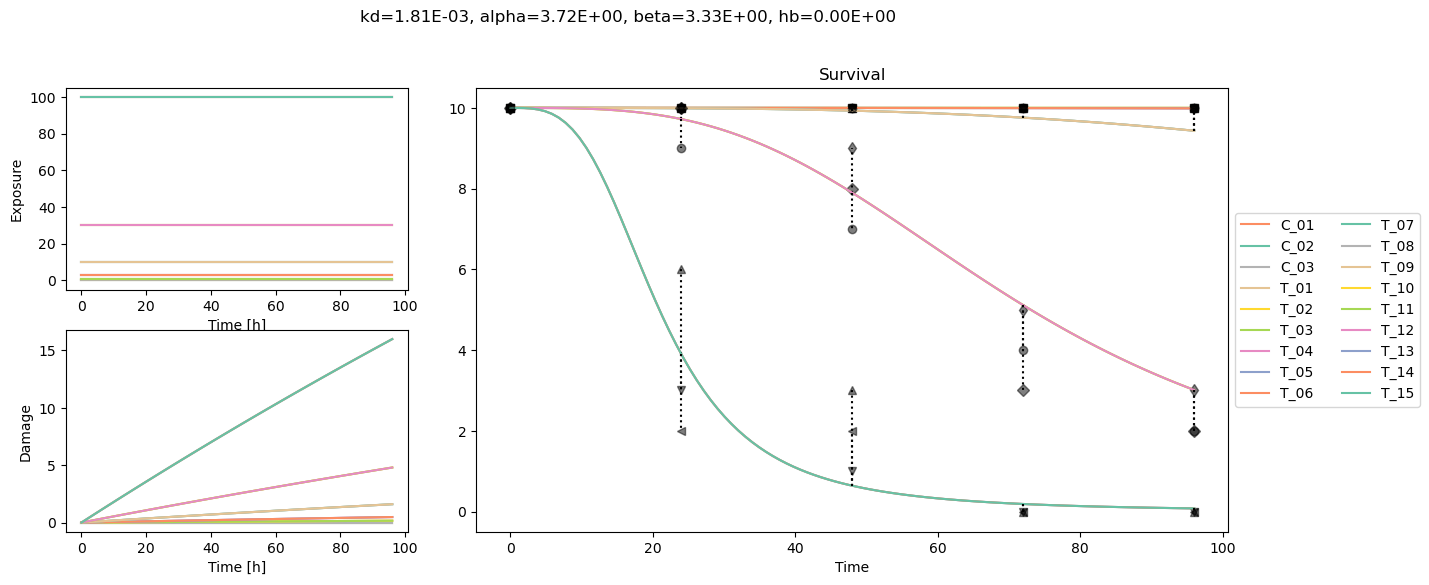

In [23]:
# Change between SD and IT model
it_model = MEMpytox.GUTS_RED_IT()

it_model.params = res[1][2].params 
# shows model results
fig, ax = MEMpytox.plot_fit(it_model, survival_data, exposure_funcs,subplots=False)

## Aufgabe 3: GUTS Validierung (7 P.)
Zur Validierung von Modellen sollten immer Daten verwendet werden, die nicht zum Kalibrieren verwendet wurden. Bei GUTS Modellen sind dies oft zeitlich variable ("gepulste") Expositionen im Gegensatz zu den konstanten Trainingsdaten.
### a)  Laden Sie die Validierungsdaten (```MS_V_caenis_h.xlsx```), wenden Sie ihr 'bestes' SD und IT Modell auf die Daten an und stellen Sie die Modellergebnisse im Zeitverlauf dar. (4 P.)
Das Laden, Anwenden der Modelle und Darstellen funktioniert analog zum GUTS-Beispielcode, nur werden die bereits kalibrierten Modelle verwendet. Sie können daher Codeabschnitte aus dem GUTS Beipsielcode übernehmen und neu für die Validierung zusammensetzen.

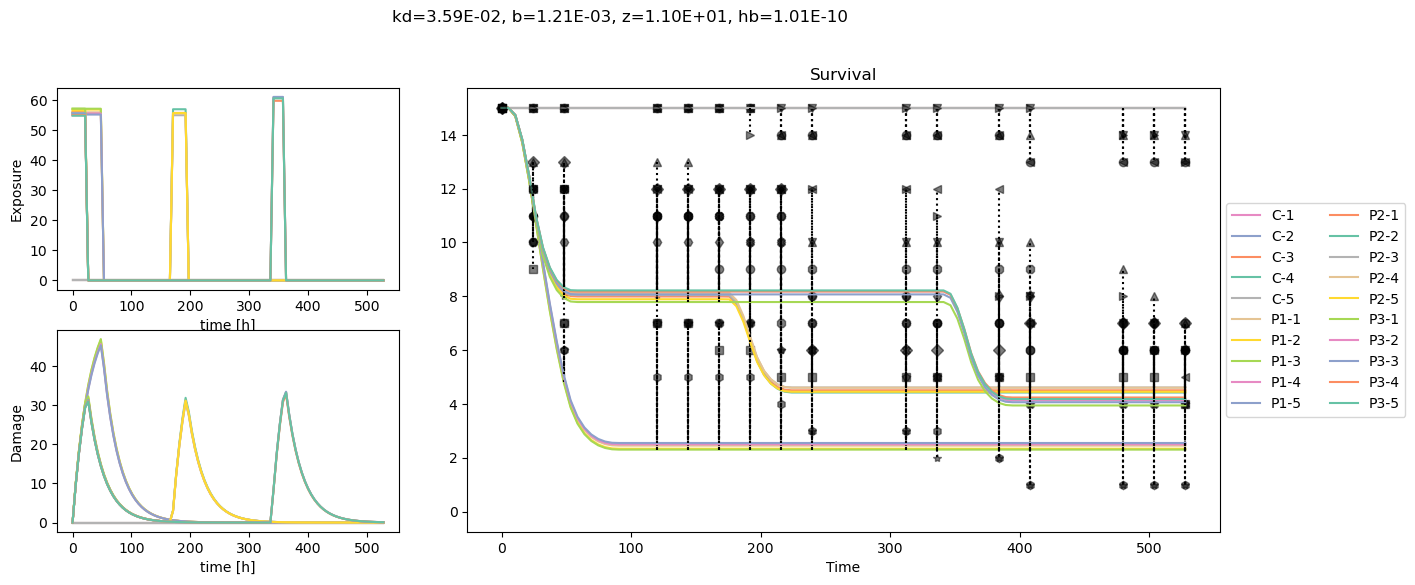

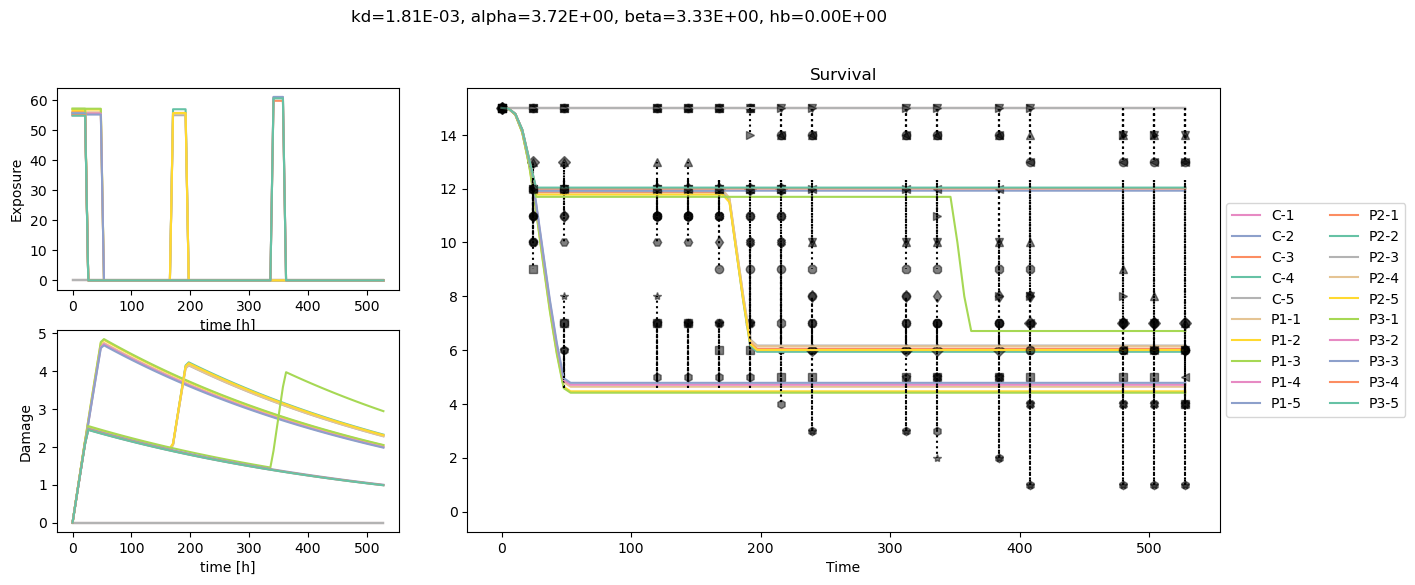

In [24]:
#Load exposure data and create interpolating functions
data_path = os.path.join("MS_V_caenis_h.xlsx")
exposure_data = pd.read_excel(data_path, sheet_name='Exposure', index_col=0)
exposure_funcs = MEMpytox.multi_interp_treatment_generator(exposure_data)

#Load survival data
survival_data = pd.read_excel(data_path, sheet_name='Survival', index_col=0)

# shows model results with starting parameters before fitting
fig, ax = MEMpytox.plot_fit(sd_model, survival_data, exposure_funcs,subplots=False)

# shows model results with starting parameters before fitting
fig, ax = MEMpytox.plot_fit(it_model, survival_data, exposure_funcs,subplots=False)

### b) Beschreiben und interpretieren Sie die beiden Grafiken. Welche Unterschiede fallen Ihnen auf? Wodurch könnten sich die Unterschiede erklären? (3 P.)

## Aufgabe 4: GUTS LC50 (4 P.)
 Mit GUTS können Sie relativ einfach für jeden beliebigen Zeitpunkt LC50 Werte berechnen.
### a) Berechnen Sie die LC50 Werte für das SD und IT Model für den Zeitraum 12-150h und stellen Sie in einer Grafik die mittels des statistischen Modells berechneten Ergebnisse aus Aufgabe 1e) sowie  die mit den beiden GUTS Modellen berechneten LC50 Werte dar. (3 P.)
Die Funktion ```MEMpytox.get_LC(model,time)``` gibt Ihnen für ein GUTS Model ```model``` den LC50 Wert zum Zeitpunkt ```time``` (z.b. 48 für 48h) zurück.

In [29]:
times = np.linspace(12, 150, 101)
sd_lc_values = []
it_lc_values = []

for time in times:
    sd_lc_values.append(MEMpytox.get_LC(sd_model, time))
    it_lc_values.append(MEMpytox.get_LC(it_model, time))

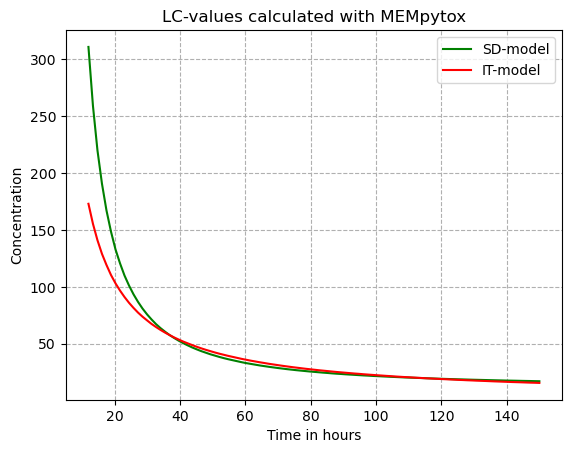

In [32]:
fig, ax = plt.subplots()
ax.plot(times, sd_lc_values, color='g', label = 'SD-model')
ax.plot(times, it_lc_values, color='r', label = 'IT-model')
ax.set(ylabel="Concentration", xlabel="Time in hours", title = 'LC-values calculated with MEMpytox')
ax.grid(linestyle = "dashed")
ax.set_axisbelow(True)
ax.legend()
plt.show()

### b) Was fällt Ihnen beim Vergleich der LC50 Werten aus den Daten und aus GUTS auf? (1 P.)

## Aufgabe 5: GUTS LP50 (schwierig) (8 P.)
Implementieren Sie hier im Notebook analog zum Code ```MEMpytox.get_LC(model,time)``` eine Funktion ```get_LP(model,time,exposure)```, die den profilspezifischen Faktor LP50 zu einem Expositionsprofil berechnet, der zu 50% Überleben zum Zeitpunkt ```time``` führt. 
Zum Testen der Funktion soll das Exposure-Profil in ```MS_caenis_LP_example.xlsx``` und ihr GUTS-RED-SD Modell verwendet werden. Die in der Datei enthaltenen Survival-Daten dienen lediglich zur Kompatibilität mit den anderen Funktionen in dieser Übung. 

Geben Sie den LP50 Wert für das Exposure-Profil nach 96h im Code aus. Erstellen Sie eine Abbildung, der das Überleben für das mit dem ermittelten LP50 Wert skalierte Exposure-Profil im Zeitverlauf zeigt.